# Problem Statement

Indian metro cities are famous for their notoriously varied traffic volume that is experienced by commuters every day. People plagued with traffic jams often raise concerns over poor traffic management systems. But with so much technology at our disposal, why should we continue to deal with traffic management in obsolete ways?

In this modern and advanced era, why the problems regarding traffic management should be dealt with in obsolete ways?

Your city's Traffic Police department has decided to use Machine Learning and Artificial Intelligence techniques to solve their traffic problems. They have collected traffic volume patterns and climate conditions that have been observed for 4 years. They want to be able to forecast the traffic volume.

Task: Your task is to predict the traffic volume for given time duration and climate conditions.

# Hypothesis Generation

The factors which might affect our dependent variable. Below are some of the hypotheses which I think can affect the traffic volume (dependent variable for this time series problem):
    1. There will be an increase in the traffic as the years pass by.
    2. The traffic will be high from May to October.
    3. Traffic on weekdays will be more as compared to weekends/holidays.
    4. Traffic during the peak hours will be high.

# Getting system ready, and, importing required libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
from datetime import datetime

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
import math
import copy

# Loading the data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

    Making a copy of data, as data changes can happen 

In [4]:
train_original = train.copy()
test_original = test.copy()

# Dataset Structure and Understanding Data

In [5]:
train.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [6]:
test.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
0,2017-05-18 00:00:00,None,73,63,1,27,4,4,285.15,0.0,0,90,Rain,moderate rain
1,2017-05-18 00:00:00,None,251,63,1,27,4,4,285.15,0.0,0,90,Mist,mist
2,2017-05-18 00:00:00,None,75,56,1,0,1,1,285.15,0.0,0,90,Drizzle,light intensity drizzle
3,2017-05-18 01:00:00,None,98,56,1,351,2,2,284.79,0.0,0,90,Rain,heavy intensity rain
4,2017-05-18 01:00:00,None,283,56,1,351,1,1,284.79,0.0,0,90,Mist,mist


In [7]:
train.dtypes

date_time               object
is_holiday              object
air_pollution_index      int64
humidity                 int64
wind_speed               int64
wind_direction           int64
visibility_in_miles      int64
dew_point                int64
temperature            float64
rain_p_h               float64
snow_p_h               float64
clouds_all               int64
weather_type            object
weather_description     object
traffic_volume           int64
dtype: object

# Feature Extraction

# converting object to date time format to segregate year, month, day, and hour

In [8]:
train['date_time'] = pd.to_datetime(train.date_time,format='%Y-%m-%d %H:%M:%S') 
test['date_time'] = pd.to_datetime(test.date_time,format='%Y-%m-%d %H:%M:%S')

In [9]:
for i in (train, test):
    i['year'] = i.date_time.dt.year
    i['month'] = i.date_time.dt.month
    i['day'] = i.date_time.dt.day
    i['Hour'] = i.date_time.dt.hour

In [10]:
train.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,Hour
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,9
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,10
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,11
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,2,12
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,2,13


# Determining day of week and weekends

In [11]:
train['day_of_week'] = train['date_time'].dt.dayofweek
temp = train['date_time']

In [12]:
def weekend_applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

In [13]:
temp2 = train['date_time'].apply(weekend_applyer)
train['weekend'] = temp2

In [14]:
train[train['weekend']==1].head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,...,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,Hour,day_of_week,weekend
81,2012-10-06 00:00:00,None,163,23,5,150,6,6,278.81,0.0,...,90,Clouds,overcast clouds,1231,2012,10,6,0,5,1
82,2012-10-06 01:00:00,None,219,23,5,160,4,4,278.55,0.0,...,90,Clouds,overcast clouds,718,2012,10,6,1,5,1
83,2012-10-06 02:00:00,None,31,25,4,150,7,7,278.59,0.0,...,90,Clouds,overcast clouds,545,2012,10,6,2,5,1
84,2012-10-06 04:00:00,None,79,32,2,140,9,9,276.99,0.0,...,75,Clouds,broken clouds,411,2012,10,6,4,5,1
85,2012-10-06 05:00:00,None,28,30,3,130,7,7,276.35,0.0,...,20,Clouds,few clouds,688,2012,10,6,5,5,1


In [15]:
test['day_of_week'] = test['date_time'].dt.dayofweek
temp = test['date_time']

temp2 = test['date_time'].apply(weekend_applyer)
test['weekend'] = temp2

In [16]:
test.shape, train.shape

((14454, 20), (33750, 21))

In [17]:
train.index = train['date_time']
test.index = test['date_time']

In [18]:
test.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,year,month,day,Hour,day_of_week,weekend
date_time,,,,,,,,,,,,,,,,,,,,
2017-05-18 00:00:00,2017-05-18 00:00:00,None,73,63,1,27,4,4,285.15,0.0,0,90,Rain,moderate rain,2017,5,18,0,3,0
2017-05-18 00:00:00,2017-05-18 00:00:00,None,251,63,1,27,4,4,285.15,0.0,0,90,Mist,mist,2017,5,18,0,3,0
2017-05-18 00:00:00,2017-05-18 00:00:00,None,75,56,1,0,1,1,285.15,0.0,0,90,Drizzle,light intensity drizzle,2017,5,18,0,3,0
2017-05-18 01:00:00,2017-05-18 01:00:00,None,98,56,1,351,2,2,284.79,0.0,0,90,Rain,heavy intensity rain,2017,5,18,1,3,0
2017-05-18 01:00:00,2017-05-18 01:00:00,None,283,56,1,351,1,1,284.79,0.0,0,90,Mist,mist,2017,5,18,1,3,0


# Exploratory Analysis

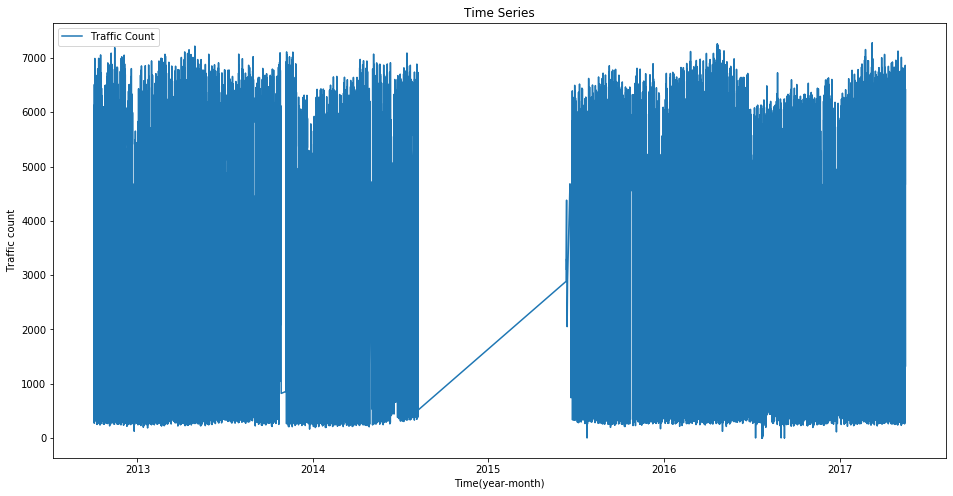

In [19]:
df = train.copy()
ts = df['traffic_volume']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Traffic Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Traffic count")
plt.legend(loc='best')

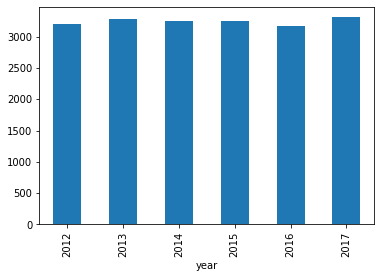

In [20]:
train.groupby('year')['traffic_volume'].mean().plot.bar()

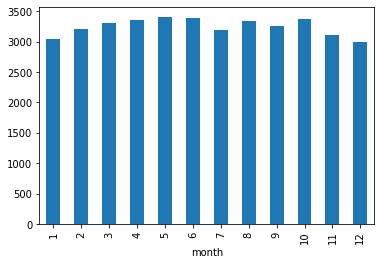

In [21]:
train.groupby('month')['traffic_volume'].mean().plot.bar()

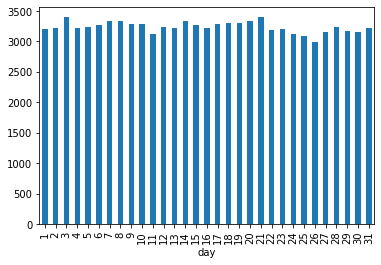

In [22]:
train.groupby('day')['traffic_volume'].mean().plot.bar()

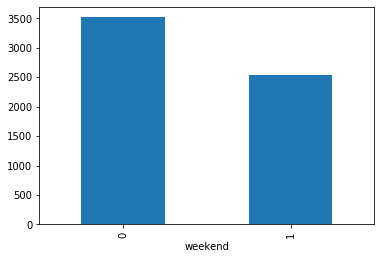

In [23]:
train.groupby('weekend')['traffic_volume'].mean().plot.bar()

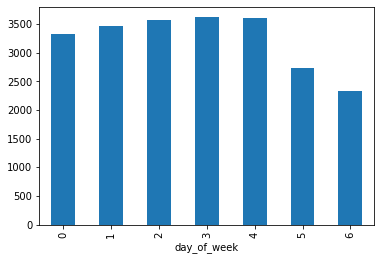

In [24]:
train.groupby('day_of_week')['traffic_volume'].mean().plot.bar()

In [25]:
hourly = train.resample('H').mean() 

daily = train.resample('D').mean()

weekly = train.resample('W').mean() 

monthly = train.resample('M').mean()

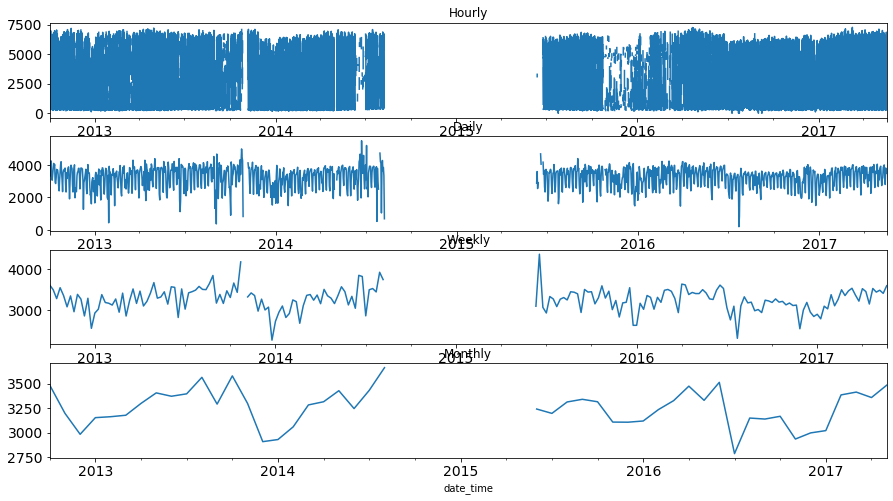

In [26]:
fig, axs = plt.subplots(4,1) 
hourly.traffic_volume.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.traffic_volume.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.traffic_volume.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.traffic_volume.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 

In [27]:
train.dtypes

date_time              datetime64[ns]
is_holiday                     object
air_pollution_index             int64
humidity                        int64
wind_speed                      int64
wind_direction                  int64
visibility_in_miles             int64
dew_point                       int64
temperature                   float64
rain_p_h                      float64
snow_p_h                      float64
clouds_all                      int64
weather_type                   object
weather_description            object
traffic_volume                  int64
year                            int64
month                           int64
day                             int64
Hour                            int64
day_of_week                     int64
weekend                         int64
dtype: object

In [28]:
test[test['year'] == 2015]

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,year,month,day,Hour,day_of_week,weekend
date_time,,,,,,,,,,,,,,,,,,,,


# Preprocessing Categorical Data

In [29]:
cat_cols = ['is_holiday','weather_type','weather_description']

In [30]:
train['is_holiday'].value_counts().count(), test['is_holiday'].value_counts().count()

(12, 12)

In [31]:
train['weather_type'].value_counts().count(), test['weather_type'].value_counts().count()

(11, 10)

In [32]:
train['weather_description'].value_counts().count(), test['weather_description'].value_counts().count()

(38, 32)

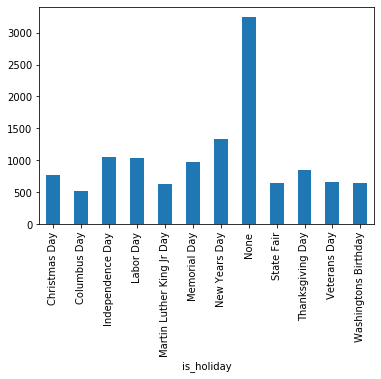

In [33]:
train.groupby('is_holiday')['traffic_volume'].mean().plot.bar()

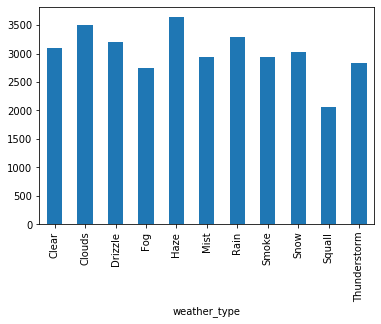

In [34]:
train.groupby('weather_type')['traffic_volume'].mean().plot.bar()

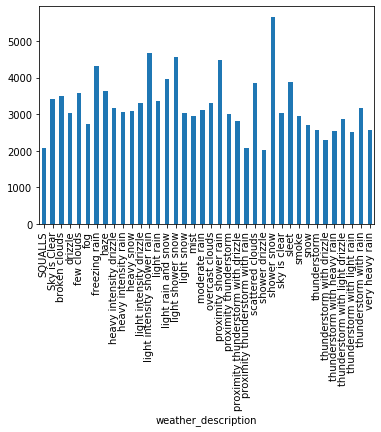

In [35]:
train.groupby('weather_description')['traffic_volume'].mean().plot.bar()

In [36]:
for cat_col in cat_cols:
    if cat_col == 'is_holiday':
        train[cat_col] = train[cat_col].astype('category')
        train[cat_col].cat.categories = set(range(1,13))
        train[cat_col] = train[cat_col].astype('int')

        test[cat_col] = test[cat_col].astype('category')
        test[cat_col].cat.categories = set(range(1,13))
        test[cat_col] = test[cat_col].astype('int')
    elif cat_col == 'weather_type':
        train[cat_col] = train[cat_col].astype('category')
        train[cat_col].cat.categories = set(range(1,12))
        train[cat_col] = train[cat_col].astype('int')

        test[cat_col] = test[cat_col].astype('category')
        test[cat_col].cat.categories = set(range(1,11))
        test[cat_col] = test[cat_col].astype('int')
    else:
        train[cat_col] = train[cat_col].astype('category')
        train[cat_col].cat.categories = set(range(1,39))
        train[cat_col] = train[cat_col].astype('int')

        test[cat_col] = test[cat_col].astype('category')
        test[cat_col].cat.categories = set(range(1,33))
        test[cat_col] = test[cat_col].astype('int')

In [37]:
train[cat_cols].head()

,is_holiday,weather_type,weather_description
date_time,,,
2012-10-02 09:00:00,8,2,25
2012-10-02 10:00:00,8,2,3
2012-10-02 11:00:00,8,2,20
2012-10-02 12:00:00,8,2,20
2012-10-02 13:00:00,8,2,3


# Preprocessing Continuous Data

In [38]:
train.describe()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,Hour,day_of_week,weekend
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,7.997956,154.841422,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,3.520000,16.959170,3240.118163,2014.639822,6.407674,15.646874,11.404385,2.982667,0.283200
std,0.143489,83.735515,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,2.739005,9.081681,1991.487289,1.572845,3.543241,8.700568,6.951078,2.005717,0.450559
min,1.000000,10.000000,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2012.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,8.000000,83.000000,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,1.000000,8.000000,1165.250000,2013.000000,3.000000,8.000000,5.000000,1.000000,0.000000
50%,8.000000,155.000000,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,2.000000,18.000000,3335.000000,2015.000000,6.000000,16.000000,11.000000,3.000000,0.000000
75%,8.000000,228.000000,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,6.000000,25.000000,4926.000000,2016.000000,10.000000,23.000000,17.000000,5.000000,1.000000
max,12.000000,299.000000,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,11.000000,38.000000,7280.000000,2017.000000,12.000000,31.000000,23.000000,6.000000,1.000000


In [39]:
train.columns

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'traffic_volume', 'year', 'month', 'day', 'Hour',
       'day_of_week', 'weekend'],
      dtype='object')

In [40]:
cols = ['air_pollution_index', 'humidity', 'wind_speed',
       'wind_direction', 'visibility_in_miles', 'dew_point', 'temperature',
       'rain_p_h', 'snow_p_h', 'clouds_all']

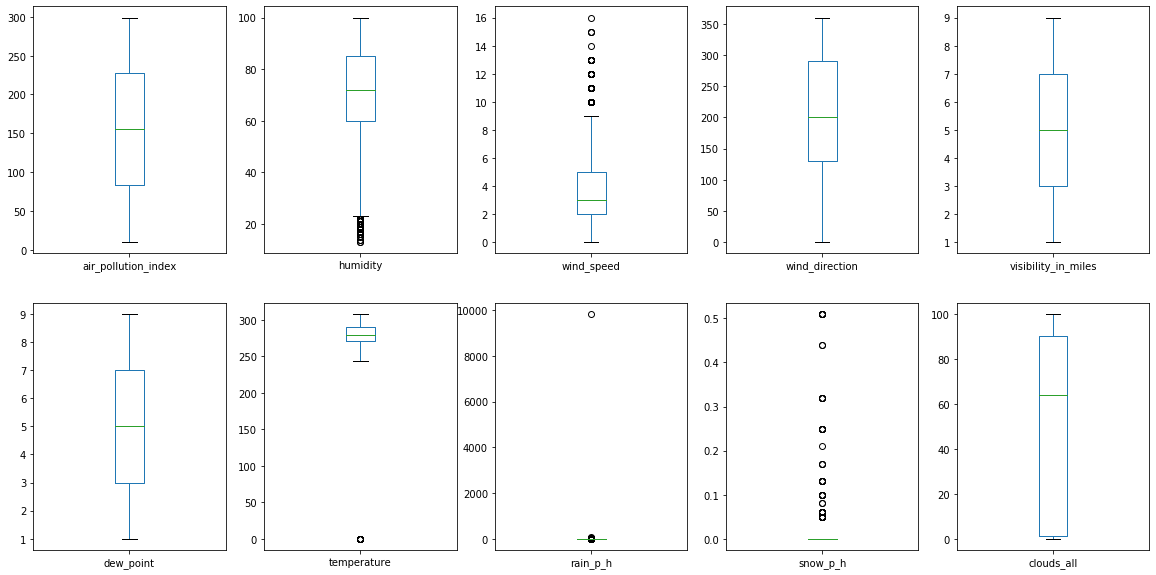

In [41]:
fig, axarr = plt.subplots(2,5, figsize=(20, 10))
k = 0
for i in range(0,2):
    for j in range(0,5):
        train[cols[k]].plot.box(ax=axarr[i][j])
        k = k + 1

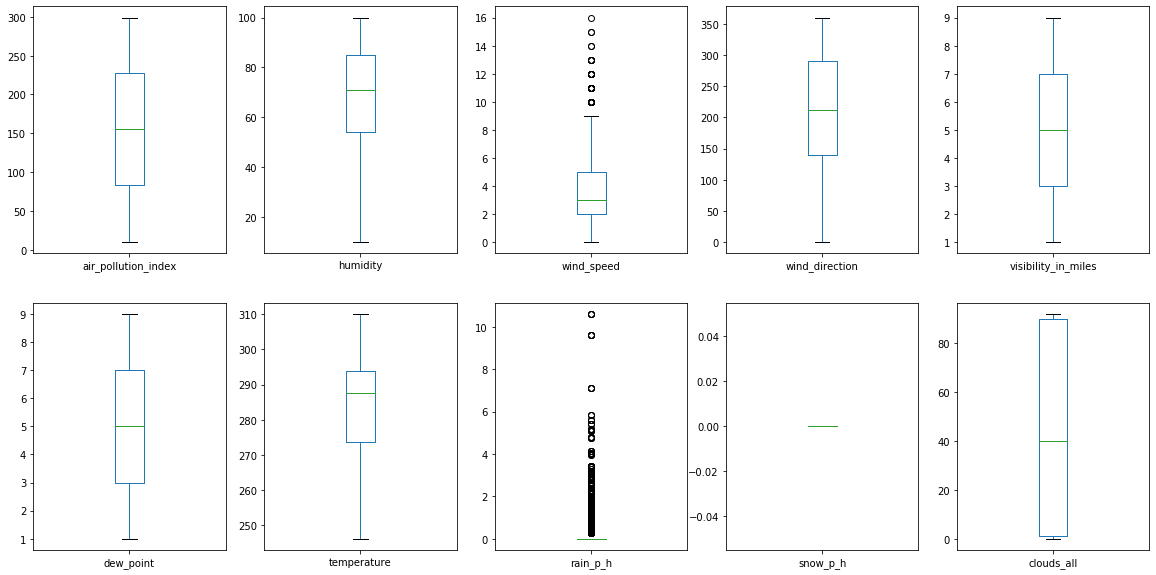

In [42]:
fig, axarr = plt.subplots(2,5, figsize=(20, 10))
k = 0
for i in range(0,2):
    for j in range(0,5):
        test[cols[k]].plot.box(ax=axarr[i][j])
        k = k + 1

In [43]:
train[cols].describe()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,154.841422,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785
std,83.735515,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734
min,10.000000,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,83.000000,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000
50%,155.000000,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000
75%,228.000000,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000
max,299.000000,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000


In [44]:
target_con = ['air_pollution_index', 'humidity', 'wind_speed',
       'wind_direction', 'visibility_in_miles', 'dew_point', 'temperature',
       'rain_p_h', 'snow_p_h', 'clouds_all','traffic_volume']

In [45]:
target_con

['air_pollution_index',
 'humidity',
 'wind_speed',
 'wind_direction',
 'visibility_in_miles',
 'dew_point',
 'temperature',
 'rain_p_h',
 'snow_p_h',
 'clouds_all',
 'traffic_volume']

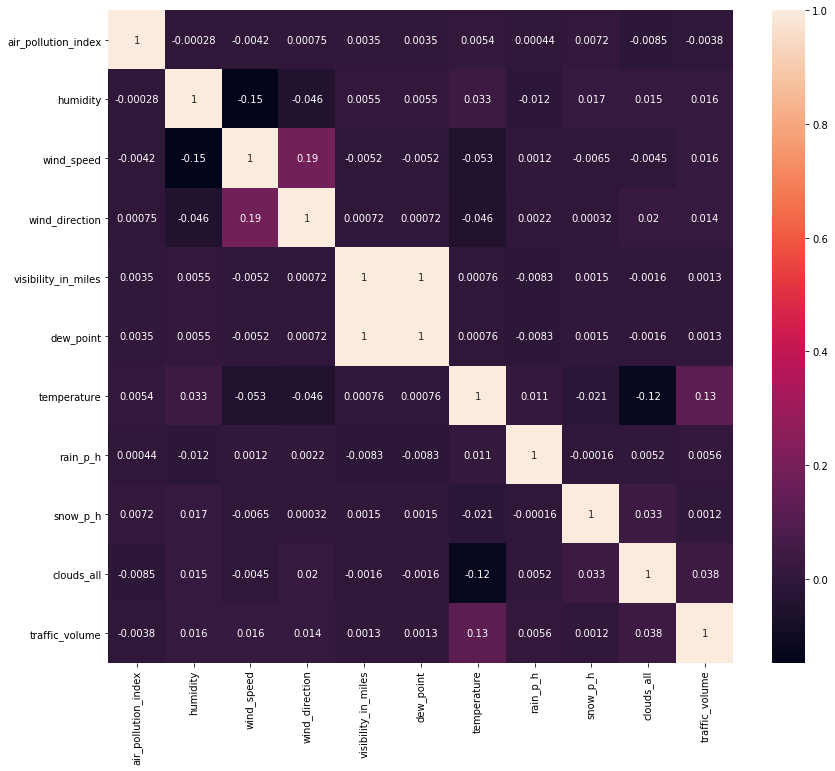

In [46]:
plt.figure(figsize=(14,12))
sns.heatmap(train[target_con].corr(), annot=True)

In [47]:
Q1_temperature = train['temperature'].quantile(0.25)
Q3_temperature = train['temperature'].quantile(0.75)
IQR_temperature = Q3_temperature  - Q1_temperature 
upper_temperature = Q3_temperature + 1.5 * IQR_temperature
lower_temperature = Q1_temperature - 1.5 * IQR_temperature
upper_temperature, lower_temperature

(318.96999999999997, 243.37000000000006)

In [48]:
print(train[train['temperature'] < lower_temperature]['temperature'].count())
print(train[train['temperature'] > upper_temperature]['temperature'].count())

10
0


In [49]:
scaler = preprocessing.StandardScaler().fit(train[cols])
train[cols] = scaler.transform(train[cols])
test[cols] = scaler.transform(test[cols])
print(scaler)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [50]:
train[cols].describe()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all
count,3.375000e+04,3.375000e+04,3.375000e+04,3.375000e+04,3.375000e+04,3.375000e+04,3.375000e+04,3.375000e+04,3.375000e+04,3.375000e+04
mean,-1.693542e-16,-3.016353e-17,-6.375818e-15,-2.937436e-16,-1.444770e-16,-1.444770e-16,1.884076e-15,-1.498875e-15,3.239750e-15,1.617712e-14
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.729775e+00,-3.454131e+00,-1.643280e+00,-1.997923e+00,-1.552441e+00,-1.552441e+00,-2.087726e+01,-8.383621e-03,-3.254579e-02,-1.298103e+00
25%,-8.579691e-01,-6.651441e-01,-6.704049e-01,-6.958346e-01,-7.742261e-01,-7.742261e-01,-6.224042e-01,-8.383621e-03,-3.254579e-02,-1.272377e+00
50%,1.893822e-03,4.693761e-02,-1.839671e-01,5.289966e-03,3.989074e-03,3.989074e-03,5.994200e-03,-8.383621e-03,-3.254579e-02,3.483615e-01
75%,8.736993e-01,8.183595e-01,7.889083e-01,9.067358e-01,7.822043e-01,7.822043e-01,7.864605e-01,-8.383621e-03,-3.254579e-02,1.017238e+00
max,1.721620e+00,1.708462e+00,6.139723e+00,1.607860e+00,1.560420e+00,1.560420e+00,2.099910e+00,1.836660e+02,5.222439e+01,1.274498e+00


# Building Model

In [51]:
xtrain = train.drop(['date_time','traffic_volume'], axis=1)
ytrain = train['traffic_volume']

xtest = test.drop(['date_time'],axis=1)

    Spliting train data for cross validation

In [52]:
x_train, x_valid, y_train, y_valid = train_test_split (xtrain, ytrain, test_size = 0.20, random_state=42)

    Using pipeline concept to validate best model for the data

In [53]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('RFR', RandomForestRegressor())])))
pipelines.append(('ScaledLGB', Pipeline([('Scaler', StandardScaler()),('LGB', LGBMRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -11934748.328214 (26094417.695868)
ScaledLASSO: -9959056.630700 (20168157.942860)
ScaledEN: -6954261.681692 (10905337.206501)
ScaledKNN: -2145085.645910 (47507.253293)
ScaledCART: -340613.028630 (22168.797407)
ScaledGBM: -320110.448307 (23966.677458)
ScaledGBM: -189142.597746 (9763.502433)
ScaledLGB: -132088.654965 (8936.049121)


    With the above analysis it is scrutinize that LGBMRegressor gives the best mean output

In [54]:
scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
param_grid = dict(n_estimators=np.array([50,100,200,300,400]))
model = LGBMRegressor(random_state=21)
kfold = KFold(n_splits=10, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-161134.286978 (9029.338555) with: {'n_estimators': 50}
-132772.510546 (8903.733871) with: {'n_estimators': 100}
-115692.061469 (8285.974698) with: {'n_estimators': 200}
-109196.436409 (7641.660070) with: {'n_estimators': 300}
-105191.246306 (7169.766309) with: {'n_estimators': 400}
Best: -105191.246306 using {'n_estimators': 400}


    Apply the LGBM Regressor in the model

In [55]:
lreg = LGBMRegressor(random_state=21, n_estimators=400)

In [56]:
lreg.fit(xtrain, ytrain)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
              random_state=21, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [57]:
import math
predict_valid = lreg.predict(x_valid)
math.sqrt(mean_squared_error(predict_valid, y_valid))

232.9150866400734

In [58]:
predict_train = lreg.predict(xtrain)
math.sqrt(mean_squared_error(predict_train, ytrain))

242.7478967640704

In [59]:
predict_test = lreg.predict(xtest)
lreg.score(xtrain, ytrain), lreg.score(xtest, predict_test)

(0.9851417130279392, 1.0)

Text(0, 0.5, 'Feature Importance Score')

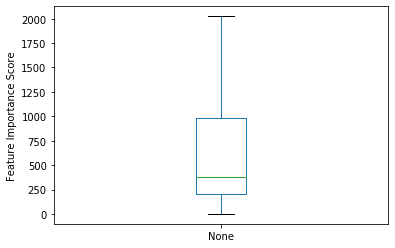

In [60]:
feat_imp = pd.Series(lreg.feature_importances_).sort_values(ascending=False)
feat_imp.plot.box()
plt.ylabel('Feature Importance Score')

# Model deployment

In [61]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [62]:
submission = pd.DataFrame()
submission['date_time'] = test_original['date_time']
submission['traffic_volume'] = predict_test
submission.to_csv('sample.csv', index=False)

# Determining Stationarity in the time series model

    Function to check whether time series data is stationary or not

In [63]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=365).mean()
    rolstd = timeseries.rolling(window=365).std()
    
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red',label='Mean')
    std = plt.plot(rolstd, color='black', label='Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Std')
    plt.show(block=False)
    
    print('Result of Dickey Fuller Test')
    dftest = adfuller(timeseries['traffic_volume'],autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Stats','p-value','#lags used','number of obs use'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key] = value

    print(dfoutput)

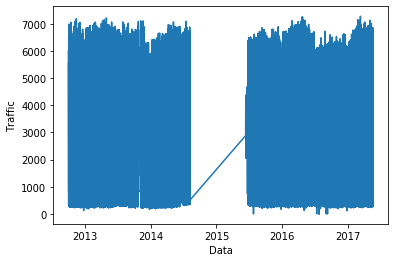

In [64]:
s_train = train_original[['date_time','traffic_volume']]
s_train['date_time'] = pd.to_datetime(s_train.date_time,infer_datetime_format=True) 
s_train = s_train.set_index(['date_time'])
s_train.head()
plt.xlabel('Data')
plt.ylabel('Traffic')
plt.plot(s_train)

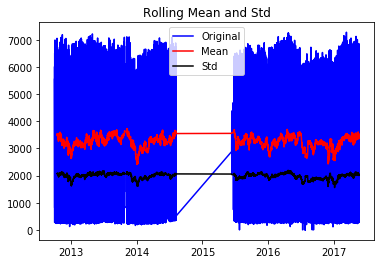

Result of Dickey Fuller Test
Test Stats               -23.779660
p-value                    0.000000
#lags used                48.000000
number of obs use      33701.000000
Critical Value(1%)        -3.430544
Critical Value(5%)        -2.861626
Critical Value(10%)       -2.566816
dtype: float64


In [65]:
test_stationarity(s_train)

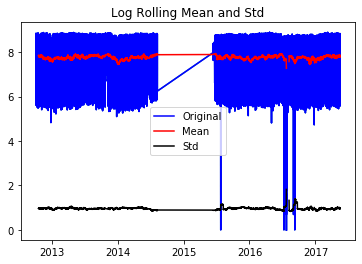

In [66]:
s_train_log = np.log(s_train)
plt.plot(s_train_log)
rolmean_log = s_train_log.rolling(window=365).mean()
rolstd_log = s_train_log.rolling(window=365).std()

orig = plt.plot(s_train_log, color='blue', label='Original')
mean = plt.plot(rolmean_log, color='red',label='Mean')
std = plt.plot(rolstd_log, color='black', label='Std')
plt.legend(loc='best')
plt.title('Log Rolling Mean and Std')
plt.show(block=False)

In [67]:
log_movingavg = s_train_log - rolmean_log
log_movingavg.head(12)

log_movingavg.dropna(inplace=True)
log_movingavg.head(10)

,traffic_volume
date_time,
2012-10-17 14:00:00,0.518628
2012-10-17 15:00:00,0.613090
2012-10-17 16:00:00,0.966998
2012-10-17 17:00:00,0.882070
2012-10-17 18:00:00,0.638388
2012-10-17 19:00:00,0.295854
2012-10-17 20:00:00,0.135333
2012-10-17 21:00:00,0.081652
2012-10-17 22:00:00,-0.274031


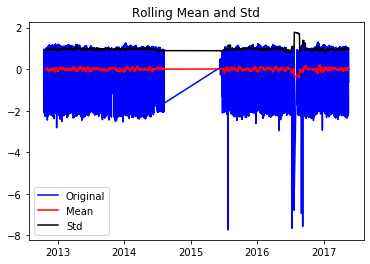

Result of Dickey Fuller Test
Test Stats               -26.062346
p-value                    0.000000
#lags used                50.000000
number of obs use      32965.000000
Critical Value(1%)        -3.430548
Critical Value(5%)        -2.861628
Critical Value(10%)       -2.566817
dtype: float64


In [68]:
test_stationarity(log_movingavg)

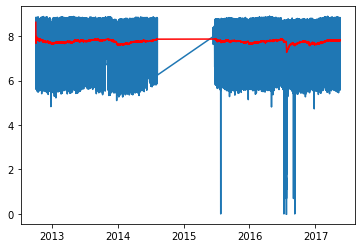

In [69]:
exp_weightavg = s_train_log.ewm(halflife=365,min_periods=0, adjust=True).mean()
plt.plot(s_train_log)
plt.plot(exp_weightavg,color='red')